# Проект "Выбор локаций для скважин"

Целевым признаком в датафреймах является колонка `product`

**Легенда** 

* `id` — уникальный идентификатор скважины;

* `f0`, `f1`, `f2` — три признака точек ;

* `product` — объём запасов в скважине (тыс. баррелей).


## 1. Загрузка и подготовка данных
### 1.1 Чтение данных 

Импорт библиотек

In [145]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

sns.set_style(style='darkgrid')
pd.set_option('precision', 3)

Чтение данных о геологоразведке трёх регионах

In [34]:
region_1 = pd.read_csv('.\datasets\geo_data_0.csv')
region_2 = pd.read_csv('.\datasets\geo_data_1.csv')
region_3 = pd.read_csv('.\datasets\geo_data_2.csv')

region_list = [region_1, region_2, region_3]

Функция, выводящая основную информацию о датафрейме

In [10]:
def show_main_info(data, info=True, describe=True, head=False, isna=False, dupl=False):
    
    if info:
        # выводит информацию о датафрейме
        print('\n\u001b[4m\u001b[1mОсновная информация о датафрейме\u001b[0m\n')
        print(data.info())

    if describe:
        # выводит основные описательные характеристики
        print('\n\u001b[4m\u001b[1mОсновные описательные характеристики датафрейма\u001b[0m')
        display(data.describe())

    if head:
        # выводит первые 5 строк
        print('\n\u001b[4m\u001b[1mПервые 5 строк датафрейме\u001b[0m')
        display(data.head())

    if isna:
        # проверяет наличие пустых ячеек
        print('\n\u001b[4m\u001b[1mКоличество пропущенных значений в столбцах датафрейма\u001b[0m')
        display(data.isna().sum())

    if dupl:
        # проверяет наличие явных дуликатов
        print('\n\u001b[4m\u001b[1mКоличество дубликатов в столбце "id" датафрейма равно:\u001b[0m {}\n'.format(
        data.duplicated().sum()))

### 1.2 Предварительный анализ датафреймов

Для предварительного анализа используется созданная функция "show_main_info" и библиотекой pandas_profiling

#### 1.2.1 Первый регион

In [11]:
profile_r1 = ProfileReport(region_1, title="Report of Region 1", progress_bar=False)
profile_r1.to_notebook_iframe()

In [84]:
show_main_info(region_1)


Основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Основные описательные характеристики датафрейма


f0          f1          f2     product
count  100000.000  100000.000  100000.000  100000.000
mean        0.500       0.250       2.503      92.500
std         0.872       0.504       3.248      44.289
min        -1.409      -0.848     -12.088       0.000
25%        -0.073      -0.201       0.288      56.498
50%         0.502       0.250       2.516      91.850
75%         1.074       0.701       4.715     128.564
max         2.362       1.344      16.004     185.364

#### 1.2.2 Второй регион

In [13]:
profile_r2 = ProfileReport(region_2, title="Report of Region 2", progress_bar=False)
profile_r2.to_notebook_iframe()

In [81]:
show_main_info(region_2)


Основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Основные описательные характеристики датафрейма


f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063       5.019721     137.945408

#### 1.2.3 Третий регион

In [15]:
profile_r3 = ProfileReport(region_3, title="Report of Region 3", progress_bar=False)
profile_r3.to_notebook_iframe()

In [80]:
show_main_info(region_3)


Основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

Основные описательные характеристики датафрейма


f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801      16.739402     190.029838

### 1.3 Вывод:

По итогам предварительного анализа даннымых видно следующее:

* Наибольшее среднее значения и медиана тыс. баррелей продукта находятся в третьем датасете. Наименьшее значение во втором датасете;
* В датасетах первого, второго и третьего регионов пропущенных значений и дубликатов не обнаружено;
* Масштабирование значений независимых и целевых признаков не требуется.

## 2. Обучение и проверка модели

### 2.1 Определение функций

Функция для предобработки данных

In [35]:
def model_preporation(data):
    
    # разделяем исходный датасет на датасеты с неизменяемыми и целевым признаками
    X = data[['f0', 'f1', 'f2']]
    y = data['product']
    
    # создаем тренировочные и валидационные датасеты
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, random_state=14)
    
    return X_train, X_valid, y_train, y_valid

Функция для представления результата работы модели

In [46]:
def model_result(prediction, y_valid, text_out=False):
    
    # считаем стандартную ошибку 
    RMSE = mean_squared_error(prediction, y_valid, squared=False)
    mean = prediction.mean()
    
    # выводим информацию на экран
    if text_out: 
        print(f'Значение стандартной ошибки RMSE модели для данного региона равно {RMSE.round(3)} тыс. баррелей.')
        print(f'Средний запас сырья данного региона равен {mean.round(3)} тыс. баррелей.')
    
    return RMSE, mean

Функция обучения линейной регрессии

In [47]:
def get_res_linear_regres(region):
    
    # применение функции model_preporation
    X_train, X_valid, y_train, y_valid = model_preporation(region)

    # обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(X_train, y_train)
    prediction = model.predict(X_valid)

    # применение функции model_result
    RMSE, mean = model_result(prediction, y_valid)
    return RMSE, mean

### 2.2 Обучение моделей

Обучение модели линейной регрессии и вывод значений стандартного отклонения и средний запас предсказанного сырья

In [51]:
RMSE_1, mean_1 = get_res_linear_regres(region_1)
RMSE_2, mean_2 = get_res_linear_regres(region_2)
RMSE_3, mean_3 = get_res_linear_regres(region_3)

Создание датафрейма с результатами обучения моделей и построение графиков визуализации данных значений

In [85]:
df_regions = pd.DataFrame({'Метрика качества RMSE':[RMSE_1, RMSE_2, RMSE_3],
                           'Средний запас сырья':[mean_1, mean_2, mean_3]},
                          index=['Регион 1', 'Регион 2', 'Регион 3'])
df_regions

Метрика качества RMSE  Средний запас сырья
Регион 1                 37.642               92.563
Регион 2                  0.893               68.895
Регион 3                 39.825               95.042

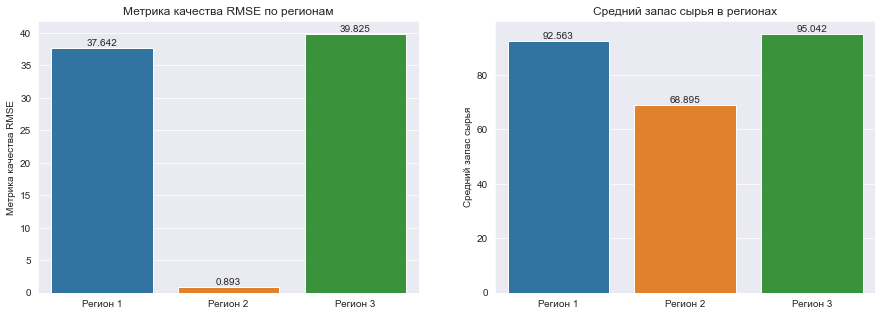

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=df_regions['Метрика качества RMSE'].index, y=df_regions['Метрика качества RMSE'], ax=ax[0])
sns.barplot(x=df_regions['Средний запас сырья'].index, y=df_regions['Средний запас сырья'], ax=ax[1])


ax[0].bar_label(ax[0].containers[0], fmt='%.3f')
ax[1].bar_label(ax[1].containers[0], fmt='%.3f')
ax[0].set_title('Метрика качества RMSE по регионам')
ax[1].set_title('Средний запас сырья в регионах')
plt.show()

### 2.3 Вывод

Из результатов предсказаний моделей Линейной регрессии на данных трех регионов получилось следующее:

* Наибольшее значение среднего запас сырья имеет третий регион - 95.042 тыс. баррелей;
* Наибольшее значение стандартной ошибки имеет третий регион - 39.825 тыс. баррелей;
* Наименьшее значение среднего запас сырья имеет второй регион - 68.895 тыс. баррелей; 
* Наименьшее значение стандартной ошибки имеет второй регион - 0.893 тыс. баррелей;
* Средний запас сырья и значение стандартной ошибки во втором регионе сильно отличаются от первого и третьего регионов.

## 3. Подготовка к расчёту прибыли

Основная информацию для расчета прибыли от скважен

In [88]:
WELLS_BUDGET = 10e9 #доступный бюджет для разработки скважин в регионе
ONE_BARREL_PRICE = 450 #стоимость одного барреля
BARRELS_PROFIT = ONE_BARREL_PRICE * 1000 #доход с одной тысячи баррелей

Рассчёт минимального необходимого запаса скважин. Сравнение минимального запаса с предсказанными средними значениями запасов скважин первого, второго и третьего регионов.

In [144]:
#расчет минимального необходимого запаса сырья скважин в регионе для её окупаемости
# с учётом того, что в регионах разрабатываются только 200 лучших скважин
min_necessary_stock = round(WELLS_BUDGET / (BARRELS_PROFIT * 200), 3)

#сравнение минимального необходимого запаса со значениями, предсказанными моделями
compare_1, compare_2, compare_3 = [round(x / min_necessary_stock, 3) for x in [mean_1, mean_2, mean_3]]

print(f'Минимальный необходимый запас скаважины для ее окупаемости равен {min_necessary_stock} тыс. баррелей\n')
#print(f'Отношение среднего запаса сырья скважин первого региона к минимальному необходимому запасу равен {compare_1}')
#print(f'Отношение среднего запаса сырья скважин второго региона к минимальному необходимому запасу равен {compare_2}')
#print(f'Отношение среднего запаса сырья скважин третьего региона к минимальному необходимому запасу равен {compare_3}')

Минимальный необходимый запас скаважины для ее окупаемости равен 111.111 тыс. баррелей



График полученных значений

In [125]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x=['Регион 1', 'Регион 2', 'Регион 3'], y=[compare_1, compare_2, compare_3])

ax.bar_label(ax.containers[0], fmt='%.3f')
plt.title('Отношение среднего запаса сырья скважин к минимальному необходимому запасу в регионах')
plt.ylabel('Отношение')
plt.show()

### Вывод

Из проведенного расчета видно, что средние запасы сырья скважин первого и третьего регионов близок к необходимому для окупаемости запасу. Средние запасы сырья скважин второго региона имеет меньшее значение чем первый и третьей регионы. Его среднее значение меньше необходимого для окупаемости значения запаса сырья.

## 4. Расчёт прибыли и рисков 

### Расчёт прибыли в регионах

Для расчета прибыли и рисков зададим дополнительную информацию о количестве разрабатываемых скважен и максимально допустимую вероятность убытка.

In [15]:
BEST_POINT_AMOUNT= 200 #количество наилучших скважен, необходимых для исследования
LOSS_PROBABILITY= 0.025 #максимально допустимая вероятность убытка

Создадим функцию, которая из датафрейма с предсказаниями отберет необходимое количество скважен с наибольшим значениям объема сырья. Используя индексы этих скважен из валидационных выборок получит реально имеющийся объем сырья в этих скважен.

In [16]:
def choice_function(y_valid, prediction, choice_amount):
    
    #создадим датафрейм из данными, предсказанных ML модели. Отсортируем по убыванию и отберем необходимый диапазон
    prediction_index = (pd.Series(prediction, index=y_valid.index)
                        .sort_values(ascending=False)
                        .index
                       )
    
    #из исходного датафрейма отбираем строки с индексами, которые соответствуют индексам данных в датафрейме prediction 
    #с наибольшими значениями таргета
    choiced_data = y_valid.loc[prediction_index].iloc[:choice_amount]
    
    return choiced_data

Создадим функцию, которая отберет 200 скважин, содержащих по предсказаниям ML-модели наибольшее количество сырья. Посчитает возможную прибыль с каждой скважины. Посчитаем суммарный объем запасов сырья этих скважен, суммарную возможную прибыль, валовую прибыль и валовую маржинальность.

In [17]:
def income_counter(input_data, input_prediction, cost, choice_amount, well_cost=0):
    data = input_data.copy()
    prediction = input_prediction.copy()
    
    #используем функцию отбора скважен
    choiced_stock = choice_function(data, prediction, choice_amount)
    
    #создаем итоговый датафрейм
    best_data = pd.DataFrame({'wells_stock': choiced_stock})
    
    #считаем доход с каждой скважины
    best_data['income_from_well'] = best_data['wells_stock'] * cost
    
    # одновляем индексы
    #best_data.reset_index(drop=True, inplace=True)           
    
    #считаем суммарный объем и возможный доход
    sum_stock = best_data['wells_stock'].sum().round(3)
    sum_income = best_data['income_from_well'].sum()

    print(f'Суммарное значение объема сырья отобранных скважен равно {sum_stock} тыс. барралей')
    print(f'Суммарный возможный доход с отобранных скважен равен {round(sum_income / 1e9, 3)} млрд.')

    #считаем валовый доход и валовую маржинальность
    if well_cost != 0:
        gross_profit = sum_income - well_cost

        gross_margin = gross_profit / sum_income

        print(f'Суммарный возможный валовый доход с отобранных скважен равен {round(gross_profit / 1e9, 3)} млрд.')
        print(f'Возможная валовая маржинальность с отобранных скважен равна {gross_margin.round(3)}')

    return best_data, sum_stock, sum_income, gross_profit

Применим данную функцию к первому, второму и третьему регионам и выведем интересующую информацию. Выведем первые строки полученных датафреймов. 

**Расчеты для первого региона**

In [18]:
df_reg1, sum_stock_reg1, sum_income_reg1, sum_gross_profit_reg1 = income_counter(
    y_valid_1, 
    prediction_1, 
    cost=BARRELS_PROFIT,
    choice_amount=BEST_POINT_AMOUNT,
    well_cost=WELLS_BUDGET
)

df_reg1.head()

Суммарное значение объема сырья отобранных скважен равно 30243.186 тыс. барралей
Суммарный возможный доход с отобранных скважен равен 13.609 млрд.
Суммарный возможный валовый доход с отобранных скважен равен 3.609 млрд.
Возможная валовая маржинальность с отобранных скважен равна 0.265


wells_stock  income_from_well
83095   144.009283      6.480418e+07
27658   140.631646      6.328424e+07
78948   162.153488      7.296907e+07
65743   176.807828      7.956352e+07
93716   130.985681      5.894356e+07

**Расчеты для второго региона**

In [19]:
df_reg2, sum_stock_reg2, sum_income_reg2, sum_gross_profit_reg2 = income_counter(
    y_valid_2, 
    prediction_2, 
    cost=BARRELS_PROFIT,
    choice_amount=BEST_POINT_AMOUNT,
    well_cost=WELLS_BUDGET
)

df_reg2.head()

Суммарное значение объема сырья отобранных скважен равно 27589.082 тыс. барралей
Суммарный возможный доход с отобранных скважен равен 12.415 млрд.
Суммарный возможный валовый доход с отобранных скважен равен 2.415 млрд.
Возможная валовая маржинальность с отобранных скважен равна 0.195


wells_stock  income_from_well
42738   137.945408      6.207543e+07
19483   137.945408      6.207543e+07
60464   137.945408      6.207543e+07
42432   137.945408      6.207543e+07
2242    137.945408      6.207543e+07

**Расчеты для третьего региона**

In [20]:
df_reg3, sum_stock_reg3, sum_income_reg3, sum_gross_profit_reg3 = income_counter(
    y_valid_3, 
    prediction_3, 
    cost=BARRELS_PROFIT,
    choice_amount=BEST_POINT_AMOUNT,
    well_cost=WELLS_BUDGET
)

df_reg3.head()

Суммарное значение объема сырья отобранных скважен равно 27059.862 тыс. барралей
Суммарный возможный доход с отобранных скважен равен 12.177 млрд.
Суммарный возможный валовый доход с отобранных скважен равен 2.177 млрд.
Возможная валовая маржинальность с отобранных скважен равна 0.179


wells_stock  income_from_well
3540    154.062998      6.932835e+07
98714    98.664401      4.439898e+07
6647    152.294162      6.853237e+07
69502   121.349438      5.460725e+07
41820   139.562959      6.280333e+07

**График полученных значений по трем регионам**

Для визуального сравнения полученных значений в трех регионах построим графики.

In [21]:
data_plot = pd.DataFrame({
    'region':['region 1', 'region 2','region 3'],
    'sum_stock':[sum_stock_reg1, sum_stock_reg2, sum_stock_reg3],
    'sum_income':[sum_income_reg1, sum_income_reg2, sum_income_reg3],
    'sum_gross_profit':[sum_gross_profit_reg1, sum_gross_profit_reg2, sum_gross_profit_reg3]},
)

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(17, 7))

fig.suptitle('Comparing of values of different regions')

sns.barplot(ax=axes[0], data=data_plot, x='region', y='sum_stock')
sns.barplot(ax=axes[1], data=data_plot, x='region', y='sum_income')
sns.barplot(ax=axes[2], data=data_plot, x='region', y='sum_gross_profit')

axes[0].set_title('Comparing of sum stocks of regions wells')
axes[1].set_title('Comparing of sum profit of regions wells')
axes[2].set_title('Comparing of gross profit of regions wells')

axes[0].set_ylabel('Sum stocks')
axes[1].set_ylabel('Sum profit')
axes[2].set_ylabel('Gross profit')

plt.show()

**Вывод:**

При рассмотрении 200 скважин с наибольшим объемом сырья получается, что наибольший объем сырья и наибольший валовый доход имеет первый регион. Наименьшие значения данных показателей имеет третий регион.

<div class="alert alert-block alert-info">
<b>Совет: </b> В этом блоке нужно было всего лишь определить одну функцию для подсчета. Остальные вычисления – дополнительные.
</div>

### Расчёт рисков в регионах

Для расчета рисков создадим функцию, которая с помощью метода bootstrap сделает 1000 выборок и найдет суммарный доход в каждой выборке. После чего посчитаем 95% доверительный интервал. Посчитаем вероятность убытков, то есть отношение не окупившихся выборок к окупившимся.

In [27]:
def bootstrap_model(y_valid, ml_prediction, total_amount, best_amount, cost, loss_border):
    # зададем переменные
    state = np.random.RandomState(12345)
    data = y_valid.copy()
    prediction = pd.Series(ml_prediction.copy(), index=y_valid.index)
    
    # создадим список для bootstrap
    bootstrap_sum_list = []
    
    # применим метод bootstrap, так как по условиям задачи можно использовать только 500 скважин, отберем из них лучшие 
    # с помощью функции choice_function. После чего найдем суммарный доход и добавим его в список.
    for i in range(1000):
        
        total_subsample = data.sample(n=total_amount, replace=True, random_state=state)
        prediction_index = total_subsample.index
        best_subsample_stock = choice_function(total_subsample, prediction[prediction_index], best_amount)
        best_subsample_profit = best_subsample_stock * cost
        bootstrap_sum_list.append(best_subsample_profit.sum())

    # найдем среднюю валовую прибыль
    bootstrap_profit = np.array(bootstrap_sum_list) - loss_border
    bootstrap_mean_profit = np.mean(bootstrap_profit)
    
    # найдем доверительный интервал
    confidence_interval = [np.quantile(bootstrap_profit, 0.025), np.quantile(bootstrap_profit, 0.975)]

    # найдем вероятност убытка
    loss_probabilety = (bootstrap_profit < 0).mean()
    return bootstrap_mean_profit, confidence_interval, loss_probabilety

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Пожалуйста, напечатай размер best_subsample_stock. Подумай, почему так произошло?
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Исправил ошибку в функции choice_function из-за которой в методе bootstrap попадали несколько значений с одинаковыми индексами.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Хорошо.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Для подсчета доверительного интервала стоит использовать метод квантилей, так как мы реализуем технику бутстрап.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Исправил.
</div>

<div class="alert alert-block alert-danger">

<b>Ошибка (ревью 2):</b> Правая граница посчитана неверно, так как `0.9975 - 0.025 != 0.05`.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Исправил) 
</div>

<div class="alert alert-block alert-info">

<b>Совет: </b> Риск можно было найти чуть проще: `(values < 0).mean()`, если объект типа pandas Series или numpy array.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Подкорректировал.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Спасибо!
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> В этом шаге нужно еще посчитать среднее значение прибыли.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Добавил подсчет среднего валового дохода.
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Все статистики (прибыль и интервал) должны быть посчитаны на прибыль, а не на выручку.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Исправил.
</div>

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> Отлично!
</div>

Создадим функцию, выводящую результаты работы метода bootstrap.

In [28]:
def show_result(mean_profit, confidence_interval, loss_probabilety, region_name):
    
    print(f'Среднее значение валовой выручки в {region_name.lower()} регионе равно {round(mean_profit / 1e9 , 3) } млрд.')
    
    print('Доверительный интервал валовой выручки в {0} регионе находится в диапазоне значений от {1} до {2} млрд.'.format(
        region_name,
        round(confidence_interval[0] / 1e9, 3),
        round(confidence_interval[1] / 1e9, 3))
         )
    
    print(f'Вероятность убытка в {region_name} регионе равна {loss_probabilety * 100} %.')

Применим функции для каждого региона.

In [29]:
mean_profit_reg1, confidence_interval_reg1, loss_probabilety_reg1 = bootstrap_model(y_valid_1,
                                                                                  prediction_1,
                                                                                  total_amount=500,
                                                                                  best_amount=200,
                                                                                  cost=BARRELS_PROFIT,
                                                                                  loss_border=WELLS_BUDGET)

show_result(mean_profit_reg1, confidence_interval_reg1, loss_probabilety_reg1, 'первом')

Среднее значение валовой выручки в первом регионе равно 0.451 млрд.
Доверительный интервал валовой выручки в первом регионе находится в диапазоне значений от -0.072 до 0.96 млрд.
Вероятность убытка в первом регионе равна 4.8 %.


In [31]:
mean_profit_reg2, confidence_interval_reg2, loss_probabilety_reg2 = bootstrap_model(y_valid_2,
                                                                                  prediction_2,
                                                                                  total_amount=500,
                                                                                  best_amount=200,
                                                                                  cost=BARRELS_PROFIT,
                                                                                  loss_border=WELLS_BUDGET)

show_result(mean_profit_reg2, confidence_interval_reg2, loss_probabilety_reg2, 'втором')

Среднее значение валовой выручки в втором регионе равно 0.486 млрд.
Доверительный интервал валовой выручки в втором регионе находится в диапазоне значений от 0.076 до 0.949 млрд.
Вероятность убытка в втором регионе равна 1.2 %.


In [32]:
mean_profit_reg3, confidence_interval_reg3, loss_probabilety_reg3 = bootstrap_model(y_valid_3,
                                                                                  prediction_3,
                                                                                  total_amount=500,
                                                                                  best_amount=200,
                                                                                  cost=BARRELS_PROFIT,
                                                                                  loss_border=WELLS_BUDGET)

show_result(mean_profit_reg3, confidence_interval_reg3, loss_probabilety_reg3, 'третьем')

Среднее значение валовой выручки в третьем регионе равно 0.433 млрд.
Доверительный интервал валовой выручки в третьем регионе находится в диапазоне значений от -0.132 до 0.93 млрд.
Вероятность убытка в третьем регионе равна 6.3 %.


**Вывод:** 
По условию задания нужно отбросить регионы, у которых вероятность убытка более 2,5%. По результатам исследования обнаружено, что значения вероятности убытка в первый и третий регион превышают допустимый предел. 

Максимальную вероятность убытка имеет третий регион в 6.3%.

Минимальную вероятность убытка имеет второй регион в 1.2 %.

Самый большой диапазон доверительного интервала валовой прибыли у второго региона от 0.076 до 0.949 млрд.

Из вышеперечисленного можно сделать вывод, что наилучшем для разработки сырья регионом является второй регион, так как он имеет наименьшую вероятность убытка, наибольший доверительный диапазон возможной прибыли и наименьшую стандартную ошибку предсказанных ML-моделью объемов сырья.

## Итоговый вывод

В результате исследования объемов нефтяного сырья в трех регионах была проделана следующая работа:

* Проведено предварительный анализ данных о регионах;

* Для каждого региона построены ML-модели линейной регресси и на валидационной выборке предсказаны объёмы сырья в данном регионе;

* Проведен расчет минимальное необходимого запаса сырья в скважине его сравнение с предсказанными средними значениями запасов скважин первого, второго и третьего регионов;

* Проведены расчеты суммарных объемы 200 лучших скважен в каждом регионе. Найдены суммарные прибыли, валовый доход и валовая маржинальность для этих регионов. Построены графики получены значений;

* Для регионов с помощью метода bootstrap получены доверительные интервалы и вероятности убытка.

Из проделанной работы получены следующие выводы: 

* Наибольшее значение среднего запас сырья имеет третий регион равное 95.042 тыс. баррелей;

* Наибольшее отношение среднего запаса сырья скважин к минимальному необходимому запасу имеет третий равный 0.855;

* При рассмотрении 200 скважин с наибольшим объемом сырья наибольший объем сырья и наибольший валовый доход имеет первый регион.

* Минимальную вероятность убытка в 1.2 % и самый большой диапазон доверительного интервала валовой прибыли от 0.076 до 0.949 млрд. имеет второй регион.


По итогу исследования для разработки скважен нефтяного сырья рекомендуется выбрать второй регион, так как только данный регион удовлетворяет требованиям по допустимым значениям вероятности убытка.

<div class="alert alert-block alert-success">
<b>Успех (ревью 2):</b> С выбором региона согласен.
</div>

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован